In [955]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import sys
import pandas as pd
import numpy as np
import pickle as pickle
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, ShuffleSplit
from sklearn.metrics import f1_score, accuracy_score, precision_score, classification_report, plot_confusion_matrix, confusion_matrix, make_scorer, recall_score
from sklearn.linear_model import LogisticRegression
from ml_models import *

In [956]:
data_csv = pd.read_csv('DataScienceChallenge.csv', sep = ',', encoding = 'latin1', error_bad_lines=False)
data = data_csv.copy()

In [957]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [958]:
data.shape

(1000, 10)

In [959]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   object 
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      900 non-null    float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 973 non-null    object 
 9   Clicked on Ad             1000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 78.2+ KB


In [960]:
data.dropna(inplace=True)  

In [961]:
data.shape

(873, 10)

In [962]:
#data['Clicked on Ad'].unique()

In [963]:
#data['Clicked on Ad'].value_counts()

In [964]:
#data['Daily Time Spent on Site'].unique()

In [965]:
data.shape

(873, 10)

In [966]:
def is_float(value):
  try:
    float(value)
    return value
  except:
    return False


In [967]:
data['Daily Time Spent on Site'] = data['Daily Time Spent on Site'].apply(lambda x: is_float(x))
data = data[data['Daily Time Spent on Site'] != False]
data['Daily Time Spent on Site'] = data['Daily Time Spent on Site'].apply(lambda x: float(x))

data.shape

(859, 10)

In [968]:
data = data[data['Daily Time Spent on Site'] != False]

In [969]:
#data['Ad Topic Line'].unique()

In [970]:
#data['City'].unique()

In [971]:
data['Country'].value_counts()

Senegal                              8
Afghanistan                          8
Turkey                               8
South Africa                         8
Cyprus                               8
                                    ..
Aruba                                1
Montserrat                           1
Jordan                               1
Panama                               1
Heard Island and McDonald Islands    1
Name: Country, Length: 233, dtype: int64

In [972]:
country_encoder = LabelEncoder()
country_encoder = country_encoder.fit(data['Country'])
data['Country'] = country_encoder.transform(data['Country'])

In [973]:
city_encoder = LabelEncoder()
city_encoder = city_encoder.fit(data['City'])
data['City'] = city_encoder.transform(data['City'])

In [974]:
AdTopicLine_encoder = LabelEncoder()
AdTopicLine_encoder = AdTopicLine_encoder.fit(data['Ad Topic Line'])
data['Ad Topic Line'] = AdTopicLine_encoder.transform(data['Ad Topic Line'])

In [975]:
#transform date
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%Y/%m/%d %H:%M:%S')

In [976]:
data['Year'] = data['Timestamp'].dt.year
data['Hour'] = data['Timestamp'].dt.hour

In [977]:
data.Year.unique()

array([2016])

In [978]:
data = data.drop(labels=["Year", "Timestamp"], axis=1)

In [979]:
# 
filter1 = data[data["Clicked on Ad"] == '0']
filter2 = data[data["Clicked on Ad"] == '1']
frames = [filter1, filter2]
data_filtred = pd.concat(frames)
data_filtred["Clicked on Ad"] = data_filtred["Clicked on Ad"].apply(lambda x: int(x))

In [980]:
#data['Daily Internet Usage'].unique()

In [981]:
data_filtred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 859 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  859 non-null    float64
 1   Age                       859 non-null    int64  
 2   Area Income               859 non-null    float64
 3   Daily Internet Usage      859 non-null    float64
 4   Ad Topic Line             859 non-null    int64  
 5   City                      859 non-null    int64  
 6   Male                      859 non-null    int64  
 7   Country                   859 non-null    int64  
 8   Clicked on Ad             859 non-null    int64  
 9   Hour                      859 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 73.8 KB


In [982]:
data_filtred.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Hour
0,68.95,35,61833.90,256.09,79,832,0,211,0,0
1,80.23,31,68441.85,193.77,394,780,1,145,0,1
2,69.47,26,59785.94,236.50,486,99,0,180,0,20
3,74.15,29,54806.18,245.89,772,812,1,102,0,2
4,68.37,35,73889.99,225.58,653,693,0,95,0,3


In [983]:
data_filtred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 859 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  859 non-null    float64
 1   Age                       859 non-null    int64  
 2   Area Income               859 non-null    float64
 3   Daily Internet Usage      859 non-null    float64
 4   Ad Topic Line             859 non-null    int64  
 5   City                      859 non-null    int64  
 6   Male                      859 non-null    int64  
 7   Country                   859 non-null    int64  
 8   Clicked on Ad             859 non-null    int64  
 9   Hour                      859 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 73.8 KB


In [984]:
correlation_df = data_filtred.corr()
correlation_df.style.background_gradient(cmap='coolwarm').set_precision(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Hour
Daily Time Spent on Site,1.00,-0.33,0.32,0.52,-0.01,0.01,-0.03,0.01,-0.74,-0.01
Age,-0.33,1.00,-0.19,-0.38,-0.02,0.00,-0.03,0.00,0.49,-0.08
Area Income,0.32,-0.19,1.00,0.33,-0.04,-0.03,-0.01,0.06,-0.48,0.04
Daily Internet Usage,0.52,-0.38,0.33,1.00,0.02,-0.01,0.02,0.01,-0.79,0.07
Ad Topic Line,-0.01,-0.02,-0.04,0.02,1.00,-0.03,-0.01,0.05,0.01,0.01
City,0.01,0.00,-0.03,-0.01,-0.03,1.00,0.00,0.01,-0.01,0.02
Male,-0.03,-0.03,-0.01,0.02,-0.01,0.00,1.00,-0.02,-0.02,0.07
Country,0.01,0.00,0.06,0.01,0.05,0.01,-0.02,1.00,-0.01,0.05
Clicked on Ad,-0.74,0.49,-0.48,-0.79,0.01,-0.01,-0.02,-0.01,1.00,-0.05
Hour,-0.01,-0.08,0.04,0.07,0.01,0.02,0.07,0.05,-0.05,1.00


In [985]:
def save_pipeline(
    pipeline, 
    pipeline_name:str='', 
    path:str=''
    ):
    '''
    Description : this method will save a specefic machine learning pipeline in a given path
    Params : 
        pipeline : sklearn.pipeline : machine learning pipeline
        pipeline_name : str :  the pipeline name
        path : str : the path where we will save the pipeline
    '''
    with open(r"./models/"+pipeline_name+".pickle", "wb") as output_file:
        pickle.dump(pipeline, output_file)
        
def split_data_and_train_pipeline(
    data, 
    features_cols, 
    label_col:str, 
    model
    ):
    '''
    Description : this method will create train test dataset, build the pipeline, train and save it
    Params : 
        data : Dataframe : Dataframe thea holds the data
        features_cols : list(str) :  list that holds the features columns names
        label_col : str :  name of the target
        model : sklearn model : the machine learning model that will be used for the training and prediction
    '''
    # split data
    sentances = data[features_cols].values
    labels = data[label_col].values
    X_train, X_test, y_train, y_test = train_test_split(sentances, labels, test_size=0.2, random_state=42, stratify=labels)
    model_name = model.__class__.__name__
    # create pipeline
    clf = get_gridsearchcv_obj(model)
    
    # Flat data 
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    
    # train pipeline
    clf = clf.fit(X=X_train, y=y_train)
    save_pipeline(clf,pipeline_name =model_name)
    return clf, X_test, y_test, X_train

def evaluation(
    clf, 
    X_test, 
    y_test, 
    average:str='binary'
    ):
    '''
    Description : this method will be used to evaluate the created model
    Params : 
        clf : sklearn model : the machine learning model to evaluate
        X_test : Series :  Series that holds the features columns
        y_test : Series :  Series that holds the target column 
        average : str :  average method used to evaluate the model
    '''
    y_pred = clf.predict(X_test)
    # Evaluation using f1_score, precision_score, accuracy_score, confusion_matrix and the classification_report
    f1_s = f1_score(y_test, y_pred, average=average) #F1 = 2 * (precision * recall) / (precision + recall)
    prec_score = precision_score(y_test, y_pred, average=average)#tp / (tp + fp)
    acc = accuracy_score(y_test, y_pred)#tp +tn/ (tp + fp + tn + fn)
    rec = recall_score(y_test, y_pred, average='weighted')#tp / (tp + fn)
    c_mx = confusion_matrix(y_test, y_pred)
    c_mx_norm = confusion_matrix(y_test, y_pred, normalize= 'true')
    clf_repport = classification_report(y_test, y_pred)
    print('f1_score:', f1_s)
    print('--------------------------------------------')
    print('precision_score:', prec_score)
    print('--------------------------------------------')
    print('accuracy_score:', acc)
    print('--------------------------------------------')
    print('recall_score:', rec)
    print('--------------------------------------------')
    print('classification_report')
    print(clf_repport)
    plt.figure(figsize=(20, 20))
    fig, ax = plt.subplots(figsize=(15, 15))
    plot_confusion_matrix(clf, X_test, y_test, ax=ax)  
    plt.show()  
    return y_pred, f1_s, prec_score, acc, rec, c_mx, clf_repport

In [986]:
### Define the models that will be used to do the prediction
### After that we will evaluate eachone of them and pick the best one

In [987]:
models = [XGBClassifier(),LogisticRegression(), 
         SGDClassifier(loss='log'), MultinomialNB(), GradientBoostingClassifier(n_estimators=10),
         RandomForestClassifier(n_estimators=10), AdaBoostClassifier(DecisionTreeClassifier()),
         ExtraTreesClassifier(n_estimators=10), MLPClassifier(hidden_layer_sizes=(20,50,)),
         KNeighborsClassifier(), ] ## Define the list of models that we will test it
results = {} ## the dictionary that will hold the results of all models
best_model= {} ## the resuls of the evaluation of the best model
best_f1 = 0 # the best f1 score: the initial value is 0
columns = list(data_filtred.columns)
X_columns = ['Daily Time Spent on Site', 'Age','Area Income','Daily Internet Usage','City','Male','Country','Hour'] ## Features columns names
label_column = 'Clicked on Ad' ## The target column name
average='binary' ## The average function that will be using

In [988]:
data_filtred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 859 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  859 non-null    float64
 1   Age                       859 non-null    int64  
 2   Area Income               859 non-null    float64
 3   Daily Internet Usage      859 non-null    float64
 4   Ad Topic Line             859 non-null    int64  
 5   City                      859 non-null    int64  
 6   Male                      859 non-null    int64  
 7   Country                   859 non-null    int64  
 8   Clicked on Ad             859 non-null    int64  
 9   Hour                      859 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 73.8 KB


############################
XGBClassifier
############################
f1_score: 0.9467455621301775
--------------------------------------------
precision_score: 0.9523809523809523
--------------------------------------------
accuracy_score: 0.9476744186046512
--------------------------------------------
recall_score: 0.9476744186046512
--------------------------------------------
classification_report
              precision    recall  f1-score   support

           0       0.94      0.95      0.95        87
           1       0.95      0.94      0.95        85

    accuracy                           0.95       172
   macro avg       0.95      0.95      0.95       172
weighted avg       0.95      0.95      0.95       172



<Figure size 1440x1440 with 0 Axes>

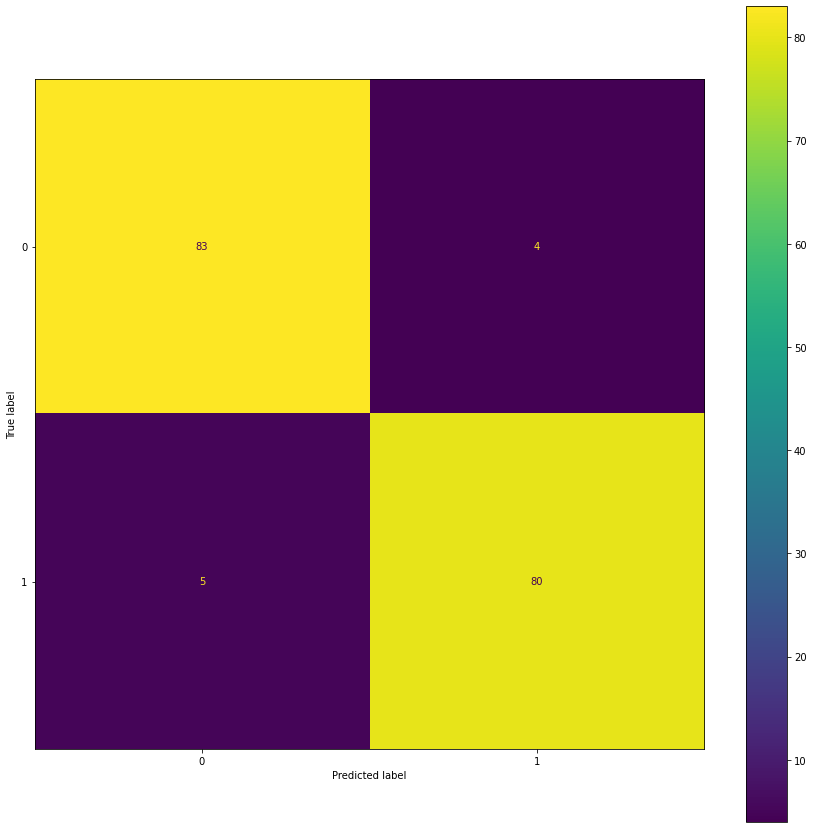

############################
LogisticRegression
############################
f1_score: 0.9221556886227545
--------------------------------------------
precision_score: 0.9390243902439024
--------------------------------------------
accuracy_score: 0.9244186046511628
--------------------------------------------
recall_score: 0.9244186046511628
--------------------------------------------
classification_report
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        87
           1       0.94      0.91      0.92        85

    accuracy                           0.92       172
   macro avg       0.93      0.92      0.92       172
weighted avg       0.92      0.92      0.92       172



<Figure size 1440x1440 with 0 Axes>

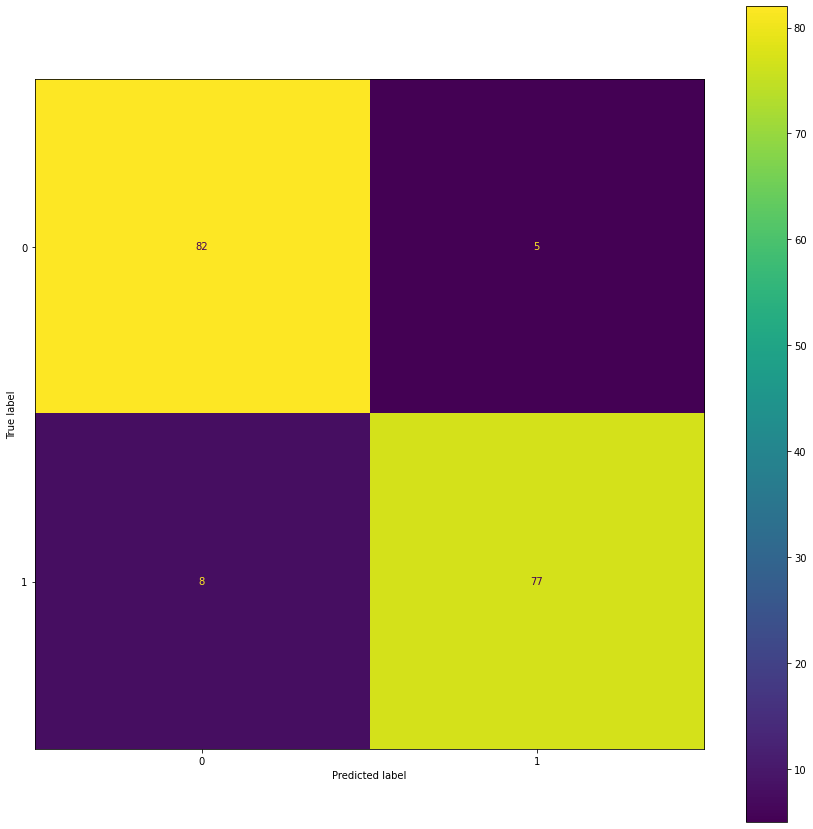

############################
SGDClassifier
############################
f1_score: 0.0
--------------------------------------------
precision_score: 0.0
--------------------------------------------
accuracy_score: 0.5058139534883721
--------------------------------------------
recall_score: 0.5058139534883721
--------------------------------------------
classification_report
              precision    recall  f1-score   support

           0       0.51      1.00      0.67        87
           1       0.00      0.00      0.00        85

    accuracy                           0.51       172
   macro avg       0.25      0.50      0.34       172
weighted avg       0.26      0.51      0.34       172



<Figure size 1440x1440 with 0 Axes>

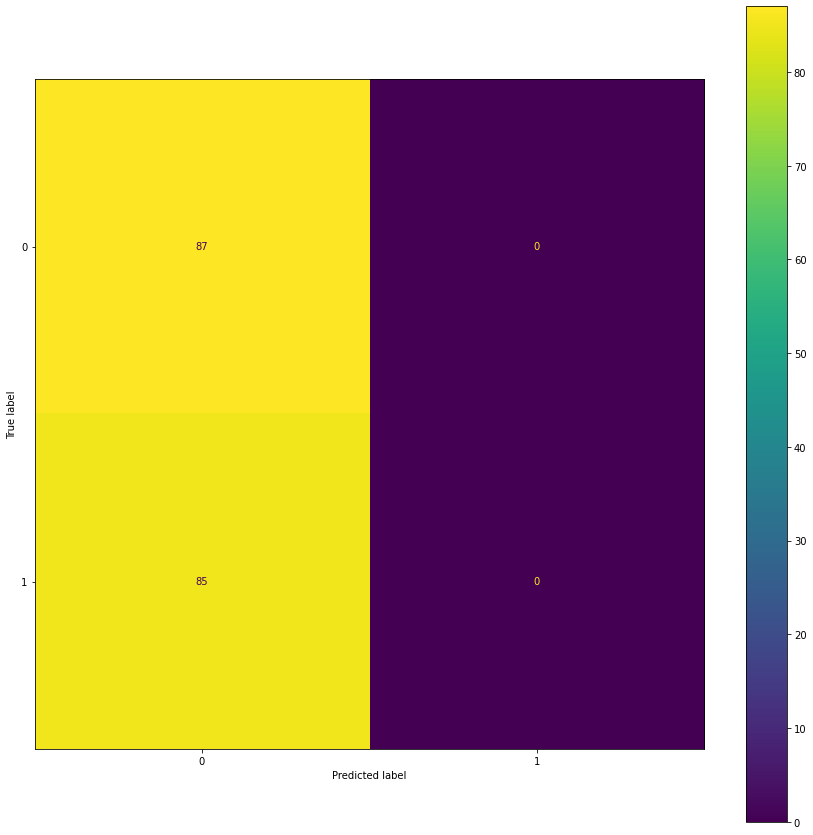

############################
MultinomialNB
############################
f1_score: 0.6145251396648045
--------------------------------------------
precision_score: 0.5851063829787234
--------------------------------------------
accuracy_score: 0.5988372093023255
--------------------------------------------
recall_score: 0.5988372093023255
--------------------------------------------
classification_report
              precision    recall  f1-score   support

           0       0.62      0.55      0.58        87
           1       0.59      0.65      0.61        85

    accuracy                           0.60       172
   macro avg       0.60      0.60      0.60       172
weighted avg       0.60      0.60      0.60       172



<Figure size 1440x1440 with 0 Axes>

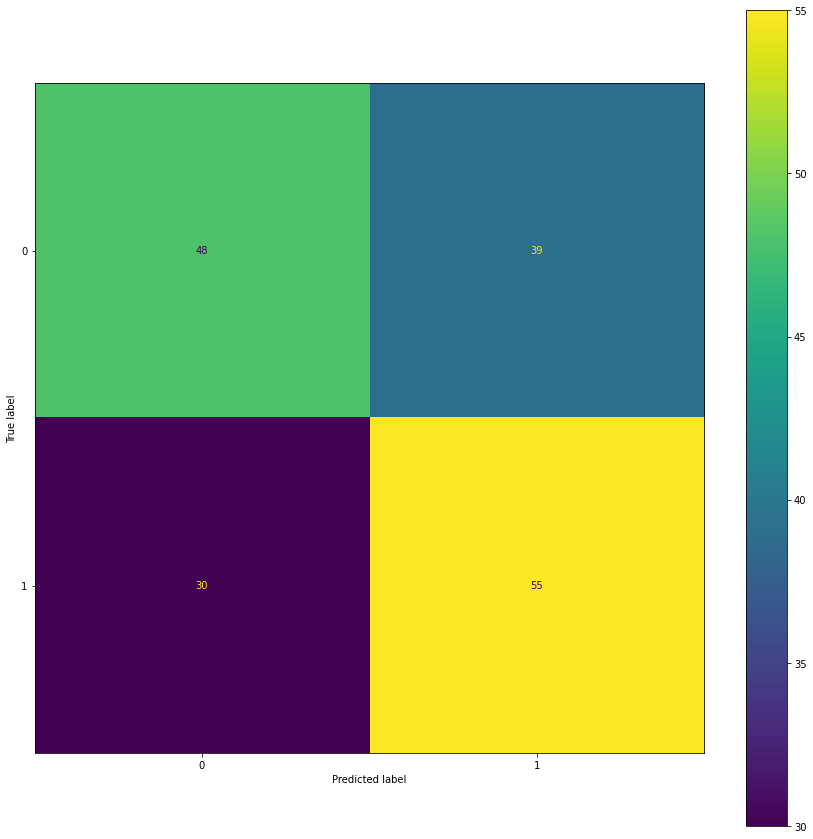

############################
GradientBoostingClassifier
############################
f1_score: 0.935672514619883
--------------------------------------------
precision_score: 0.9302325581395349
--------------------------------------------
accuracy_score: 0.936046511627907
--------------------------------------------
recall_score: 0.936046511627907
--------------------------------------------
classification_report
              precision    recall  f1-score   support

           0       0.94      0.93      0.94        87
           1       0.93      0.94      0.94        85

    accuracy                           0.94       172
   macro avg       0.94      0.94      0.94       172
weighted avg       0.94      0.94      0.94       172



<Figure size 1440x1440 with 0 Axes>

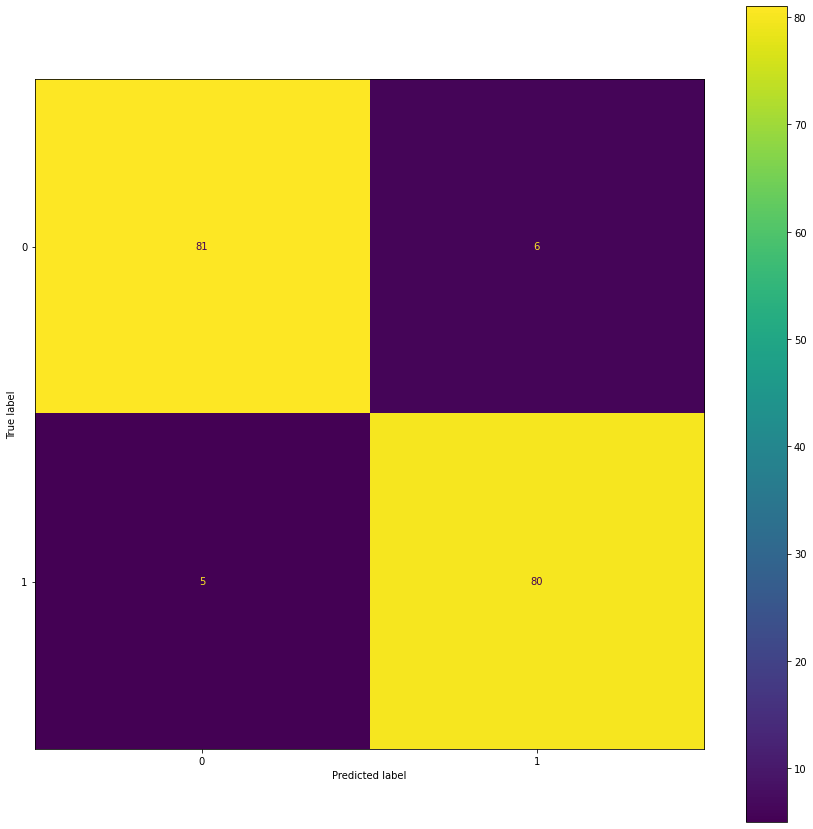

############################
RandomForestClassifier
############################
f1_score: 0.9580838323353293
--------------------------------------------
precision_score: 0.975609756097561
--------------------------------------------
accuracy_score: 0.9593023255813954
--------------------------------------------
recall_score: 0.9593023255813954
--------------------------------------------
classification_report
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        87
           1       0.98      0.94      0.96        85

    accuracy                           0.96       172
   macro avg       0.96      0.96      0.96       172
weighted avg       0.96      0.96      0.96       172



<Figure size 1440x1440 with 0 Axes>

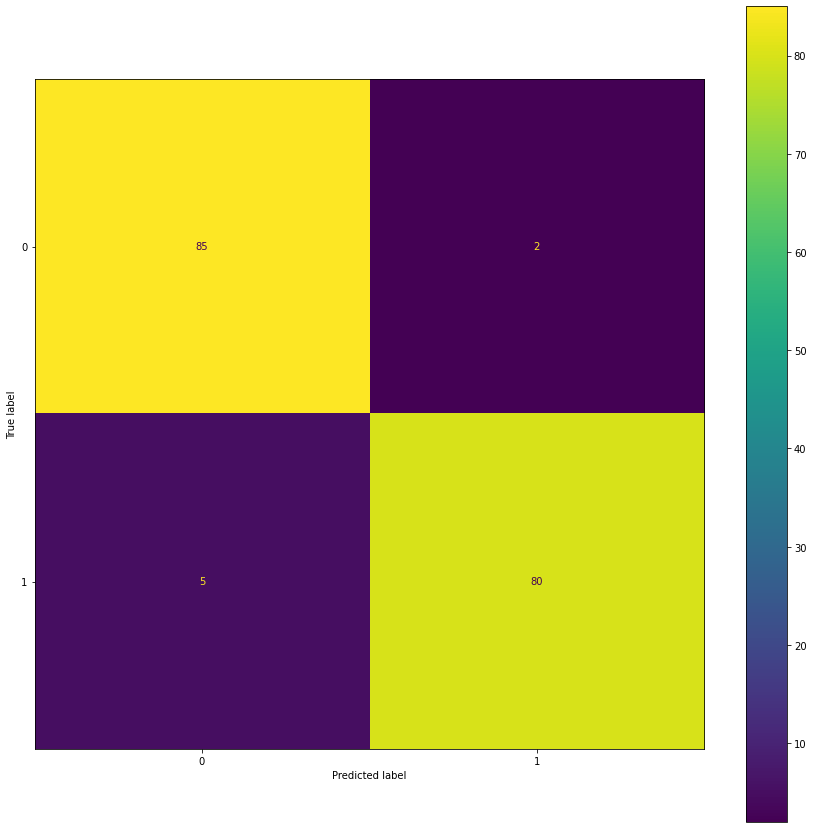

############################
AdaBoostClassifier
############################
f1_score: 0.9195402298850575
--------------------------------------------
precision_score: 0.898876404494382
--------------------------------------------
accuracy_score: 0.9186046511627907
--------------------------------------------
recall_score: 0.9186046511627907
--------------------------------------------
classification_report
              precision    recall  f1-score   support

           0       0.94      0.90      0.92        87
           1       0.90      0.94      0.92        85

    accuracy                           0.92       172
   macro avg       0.92      0.92      0.92       172
weighted avg       0.92      0.92      0.92       172



<Figure size 1440x1440 with 0 Axes>

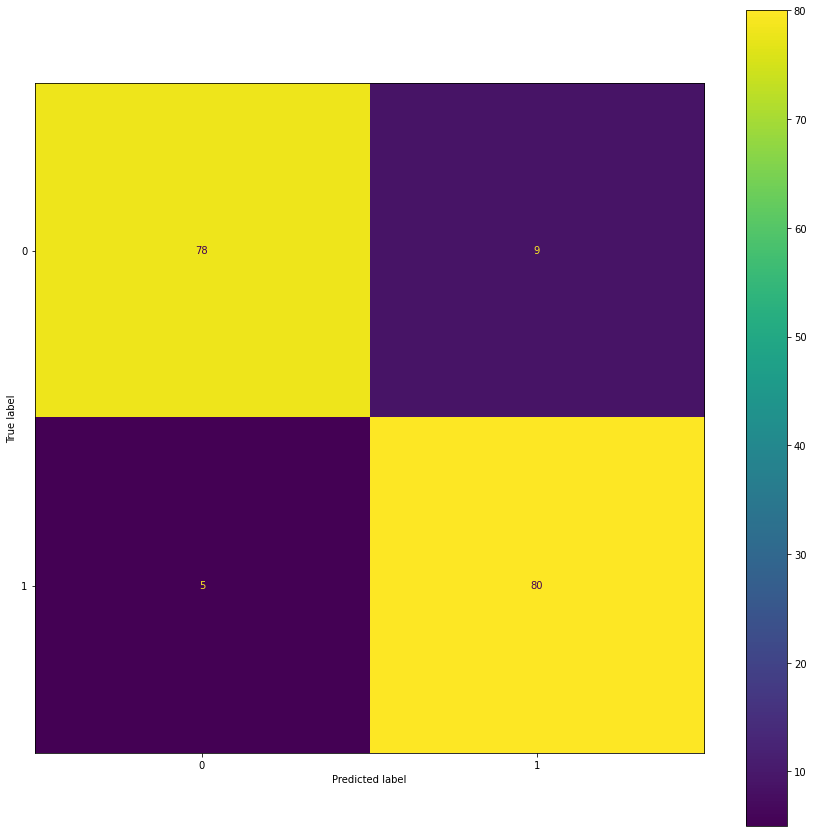

############################
ExtraTreesClassifier
############################
f1_score: 0.963855421686747
--------------------------------------------
precision_score: 0.9876543209876543
--------------------------------------------
accuracy_score: 0.9651162790697675
--------------------------------------------
recall_score: 0.9651162790697675
--------------------------------------------
classification_report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        87
           1       0.99      0.94      0.96        85

    accuracy                           0.97       172
   macro avg       0.97      0.96      0.97       172
weighted avg       0.97      0.97      0.97       172



<Figure size 1440x1440 with 0 Axes>

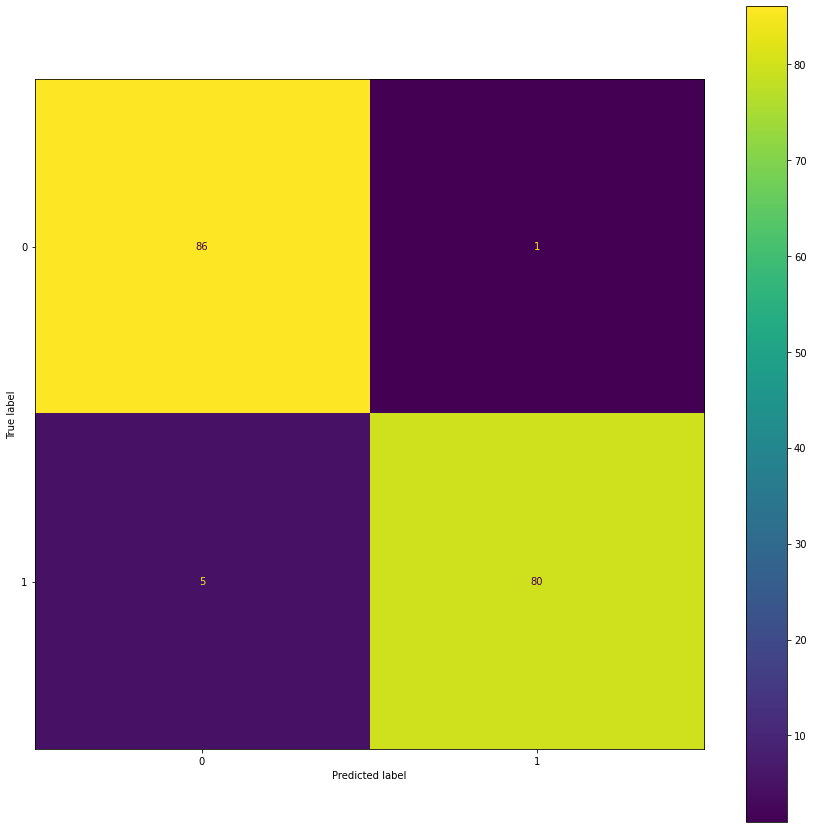

############################
MLPClassifier
############################
f1_score: 0.6614785992217899
--------------------------------------------
precision_score: 0.4941860465116279
--------------------------------------------
accuracy_score: 0.4941860465116279
--------------------------------------------
recall_score: 0.4941860465116279
--------------------------------------------
classification_report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        87
           1       0.49      1.00      0.66        85

    accuracy                           0.49       172
   macro avg       0.25      0.50      0.33       172
weighted avg       0.24      0.49      0.33       172



<Figure size 1440x1440 with 0 Axes>

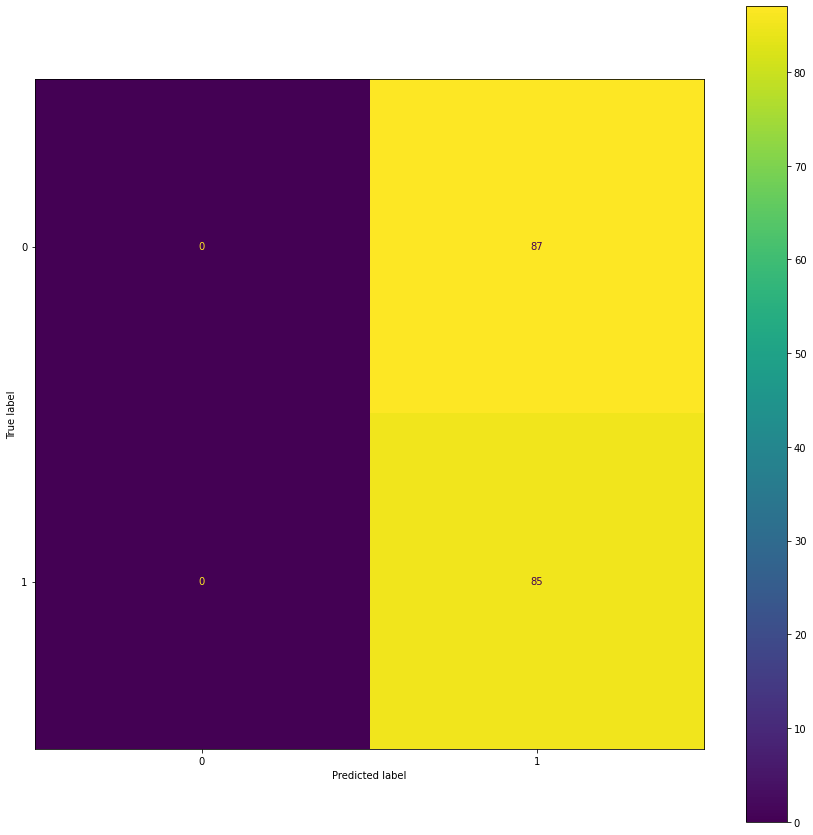

############################
KNeighborsClassifier
############################
f1_score: 0.7455621301775148
--------------------------------------------
precision_score: 0.75
--------------------------------------------
accuracy_score: 0.75
--------------------------------------------
recall_score: 0.75
--------------------------------------------
classification_report
              precision    recall  f1-score   support

           0       0.75      0.76      0.75        87
           1       0.75      0.74      0.75        85

    accuracy                           0.75       172
   macro avg       0.75      0.75      0.75       172
weighted avg       0.75      0.75      0.75       172



<Figure size 1440x1440 with 0 Axes>

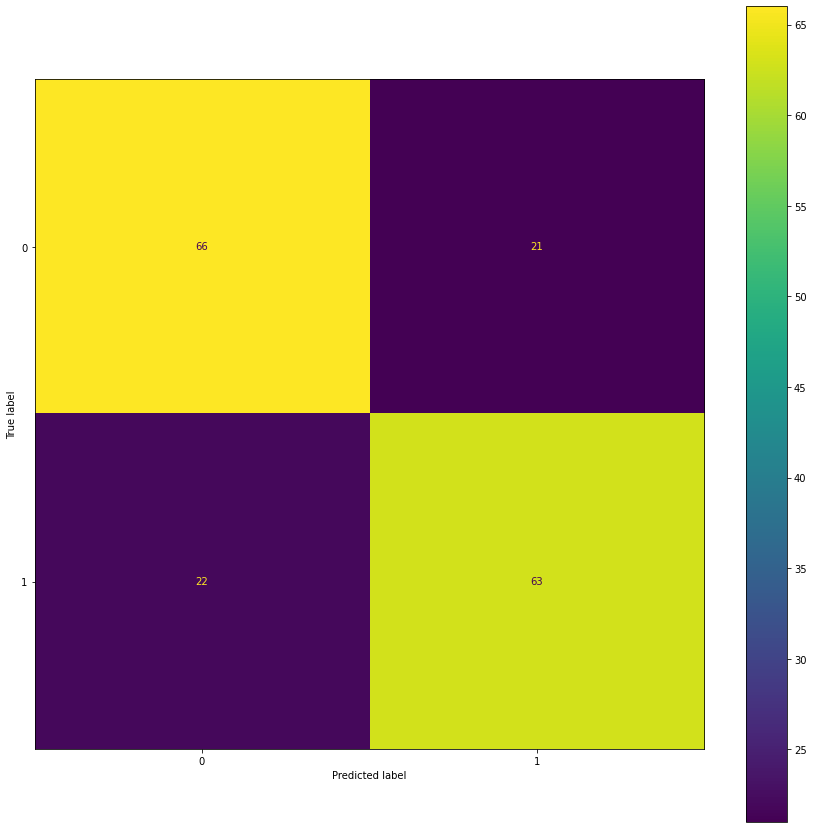

In [989]:
for model in models:
    print('############################')
    print(model.__class__.__name__)
    print('############################')
    inter_result = {}
    
    clf_1, X_test, y_test, X_train = split_data_and_train_pipeline(data_filtred, X_columns, label_column, model)
    y_pred, f1_s, prec_score, acc, rec, c_mx, clf_repport = evaluation(clf_1, X_test, y_test, average=average)
    
    
    inter_result['classifier'] = clf_1
    inter_result['X_test'] = X_test
    inter_result['y_test'] = y_test
    inter_result['y_pred'] = y_pred
    inter_result['f1_score'] = f1_s
    inter_result['precison_score'] = prec_score
    inter_result['accuracy_score'] = acc
    inter_result['recall_score'] = rec
    inter_result['confusion_matrix'] = c_mx
    inter_result['classification_report'] = clf_repport
    inter_result['model_name'] = model.__class__.__name__
    results[model.__class__.__name__] = inter_result

    if best_f1<f1_s:
        best_f1 = f1_s
        best_model = inter_result

Best_model : ExtraTreesClassifier
f1_score =  0.963855421686747
precison_score =  0.9876543209876543
accuracy_score =  0.9651162790697675
recall_score =  0.9651162790697675
classification_report : 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        87
           1       0.99      0.94      0.96        85

    accuracy                           0.97       172
   macro avg       0.97      0.96      0.97       172
weighted avg       0.97      0.97      0.97       172

Confusion matrix 


<Figure size 1440x1440 with 0 Axes>

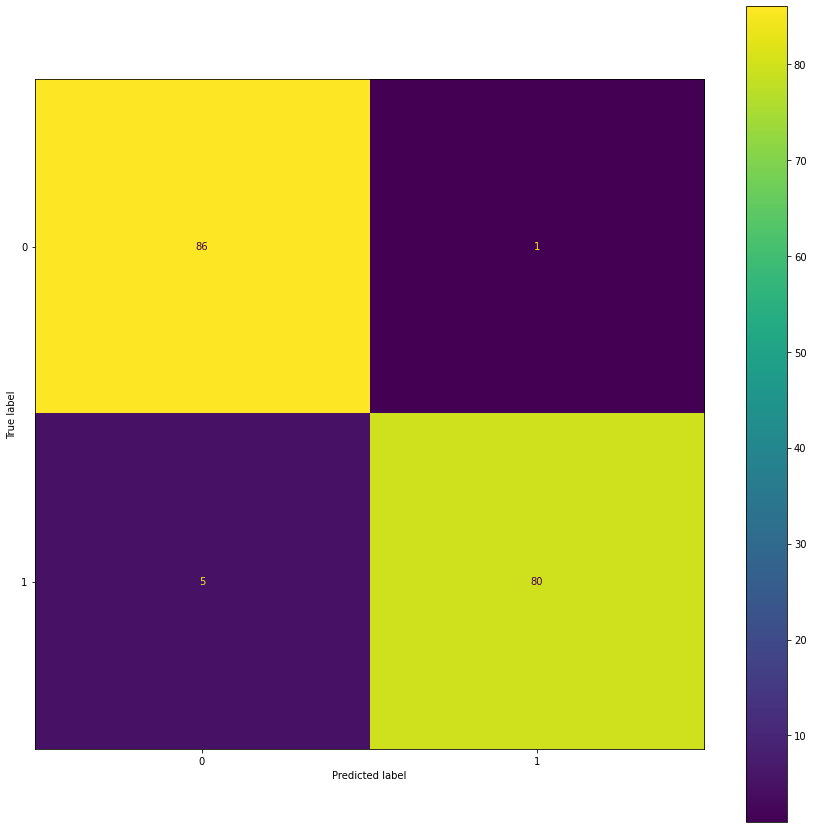

In [990]:
print('Best_model :', best_model['model_name'] )
print('f1_score = ',best_model['f1_score'])
print('precison_score = ',best_model['precison_score'])
print('accuracy_score = ',best_model['accuracy_score'])
print('recall_score = ',best_model['recall_score'])
print('classification_report : ')
print(best_model['classification_report'])
print('Confusion matrix ')
plt.figure(figsize=(20, 20))
fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(best_model['classifier'], best_model['X_test'], best_model['y_test'], ax=ax)  
plt.show()  

In [991]:
save_pipeline(best_model['classifier'], pipeline_name='best_model')